In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
import datetime 
import matplotlib.pyplot as plt

In [2]:
all_return = pd.read_csv('allreturn.txt')
eff_fro_port = pd.read_csv('EfficientFrontierPortfolio.txt')
ETF = pd.read_csv('ETF.txt')
Fama_French = pd.read_csv('Fama-French')
MSFT = pd.read_csv('Microsoft_prices.txt')

### Univariate Investment Risk and Return

In [3]:
MSFT.head()

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


In [4]:
# Calculate daily return
MSFT['Return'] = MSFT['Adjusted'].pct_change()

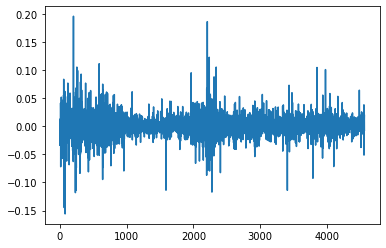

In [5]:
MSFT['Return'].plot()

In [6]:
# Calculate mean daily return
mean_daily_return = np.mean(MSFT['Return'])
mean_daily_return

0.00037777546435757725

In [7]:
# The investors are only interested in the annual return. Thus, we calculate annual return from daily return using the formula 
# ((1+daily_return)^252) - 1
annual_return = ((1+mean_daily_return)**252) - 1
annual_return

0.09985839482858783

In [8]:
# In the 18 years span, from 2000 to 2018, Microsoft stock earns investor an average 10% return per year

In [9]:
# Investors are also interested to learn about how volatily the stock is
# We can find it using the standard deviation

In [10]:
daily_std = np.std(MSFT['Return'])
daily_std

0.019341100408708328

In [11]:
# Similar to the return, annual standard deviation is what we are looking for
# Annual std = n^0.5 * daily_std. Since there are 252 trading days, so n = 252 in this case
annual_std = daily_std * np.sqrt(252)
annual_std

0.3070304505826317

In [12]:
from scipy.stats import skew
skew(MSFT['Return'].dropna())

0.21935459193067852

In [13]:
# Negative skewness suggest the data is not normal. Skew to the left

In [14]:
from scipy.stats import kurtosis
kurtosis(MSFT['Return'].dropna())

10.31457261802553

In [15]:
# The kurtosis function return a excess kurtosis, to find a true kurtosis value, add 3 to 4.3 = 7.3
# The normal distribution kurtosis is 3, clearly the stock is not normal
# We will perform one more test called Shapiro-Wilk to confirm it is not normal

In [16]:
from scipy.stats import shapiro
daily_return = mean_daily_return.dropna()
shapiro_results = shapiro(daily_return)
print("Shapiro results:", shapiro_results)

# Extract the p-value from the shapiro_results
p_value = shapiro_results[1]
print("P-value: ", p_value)


AttributeError: 'float' object has no attribute 'dropna'

In [ ]:
# Since p-value is smaller than 0.05, we can strongly confirm that the stock is not normally distributed

### CAPM

In [ ]:
Fama_French.head()

In [ ]:
Fama_French['Port_Excess'] = Fama_French['Portfolio'] - Fama_French['RF']

In [ ]:
CumulativeReturns = ((1+Fama_French[['Portfolio','Port_Excess']]).cumprod()-1)

In [ ]:
CumulativeReturns.plot()

### There are 2 ways of calculating Beta: Using covariance and CAPM

#### Using covariance

In [ ]:
## Beta = Cov / Var(Benchmark Index)
cov_matrix = Fama_French[['Port_Excess','Market_Excess']].cov()

In [ ]:
cov_coef = cov_matrix.iloc[0,1]

In [ ]:
cov_coef

#### Using CAPM

In [ ]:
# Import statsmodels.formula.api
import statsmodels.formula.api as smf

In [ ]:
CAPM_model = smf.ols(formula='Port_Excess~Market_Excess',data=Fama_French)

In [ ]:
CAPM_fit = CAPM_model.fit()

In [ ]:
CAPM = CAPM_fit.summary()
print(CAPM)

In [ ]:
# Extract beta
beta = CAPM_fit.params['Market_Excess']
beta

### The Fama-French 3 factor Model

In [ ]:
import statsmodels.formula.api as smf
Fama_3 = smf.ols(formula='Port_Excess~Market_Excess + SMB + HML', data=Fama_French)

In [ ]:
Fama3_fit = Fama_3.fit()

In [ ]:
Fama3_sum = Fama3_fit.summary()
print(Fama3_sum)

In [ ]:
# We can see that the R-squared for the 3 factor model is greater than the CAPM Model 

In [ ]:
portfolio_alpha = Fama3_fit.params['Intercept']
print(portfolio_alpha)

In [ ]:
# Annualize your portfolio alpha
portfolio_alpha_annualized = ((1+portfolio_alpha)**252)-1
print(portfolio_alpha_annualized)

### The 5 factor model

In [ ]:
# Define the regression formula
FamaFrench5_model = smf.ols(formula='Port_Excess ~ Market_Excess + SMB + HML + RMW + CMA', data=Fama_French)

# Fit the regression
FamaFrench5_fit = FamaFrench5_model.fit()

In [ ]:
Fama5_sum = FamaFrench5_fit.summary()
print(Fama5_sum)